In [1]:
from sklearn.metrics import accuracy_score
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay
from tabpfn import TabPFNClassifier
import pandas as pd
import time
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

In [2]:
import warnings
from ucimlrepo import fetch_ucirepo
warnings.filterwarnings('ignore')

In [3]:
import import_ipynb
import numpy as np
import torch

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
Xf = iris.data.features 
yf = iris.data.targets 
classes=yf['class'].unique().tolist()
perm = np.random.permutation(150).tolist()
Xf,yf=Xf.iloc[perm],yf.iloc[perm]

In [5]:
yf.columns

Index(['class'], dtype='object')

In [6]:
def encode_target(t,classes=classes):
    return classes.index(t)
yf['label']=yf['class'].apply(encode_target)

In [7]:
train_n=100
X=torch.tensor(Xf.iloc[0:train_n].values, dtype=torch.float32)
y=torch.tensor(yf.iloc[0:train_n]['label'].values,dtype=torch.float32)
Xtest=torch.tensor(Xf.iloc[train_n:].values,dtype=torch.float32)
ytest=torch.tensor(yf[train_n:]['label'].values,dtype=torch.float32)

In [8]:
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [9]:
classifier.model

(inf,
 inf,
 TransformerModel(
   (transformer_encoder): TransformerEncoderDiffInit(
     (layers): ModuleList(
       (0-11): 12 x TransformerEncoderLayer(
         (self_attn): MultiheadAttention(
           (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
         )
         (linear1): Linear(in_features=512, out_features=1024, bias=True)
         (dropout): Dropout(p=0.0, inplace=False)
         (linear2): Linear(in_features=1024, out_features=512, bias=True)
         (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
         (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
         (dropout1): Dropout(p=0.0, inplace=False)
         (dropout2): Dropout(p=0.0, inplace=False)
       )
     )
   )
   (encoder): Linear(in_features=100, out_features=512, bias=True)
   (y_encoder): Linear(in_features=1, out_features=512, bias=True)
   (decoder): Sequential(
     (0): Linear(in_features=512, out_features=1024, bias=True)


In [10]:
X.shape

torch.Size([100, 4])

In [11]:
start = time.time()
classifier.fit(X, y,overwrite_warning=True)
y_eval, p_eval = classifier.predict(Xtest, return_winning_probability=True)
prediction_time = time.time() - start

<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [12]:
print('Prediction time: ',prediction_time , 'Accuracy', accuracy_score(ytest, y_eval))

Prediction time:  0.3722970485687256 Accuracy 0.9


In [13]:
p_eval

array([0.99993277, 0.99986136, 0.99995756, 0.9999453 , 0.99997807,
       0.9997464 , 0.99999547, 0.9973315 , 0.9999739 , 0.9999932 ,
       0.99990165, 0.9999156 , 0.82632595, 0.9889952 , 0.99965894,
       0.9997125 , 0.9995603 , 0.9999689 , 0.9489015 , 0.9805449 ,
       0.999912  , 0.99988353, 0.9998648 , 0.99951315, 0.9452035 ,
       0.99744225, 0.9545728 , 0.9999962 , 0.9999951 , 0.99999154,
       0.8975054 , 0.99998283, 0.9997664 , 0.6342137 , 0.9998846 ,
       0.99999416, 0.9999769 , 0.99998605, 0.86943674, 0.99960405,
       0.91614383, 0.9999876 , 0.99994695, 0.9999641 , 0.9999778 ,
       0.9994955 , 0.9981274 , 0.97373474, 0.9999486 , 0.9998053 ],
      dtype=float32)

In [14]:
y_eval_train, p_eval_train = classifier.predict(X, return_winning_probability=True)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [15]:
print('Prediction time: ',prediction_time , 'Accuracy', accuracy_score(y, y_eval_train))

Prediction time:  0.3722970485687256 Accuracy 1.0


In [ ]:
probs=classifier.predict_proba(Xtest)

In [ ]:
probs

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytest, y_eval)

In [ ]:
def gini(probs):
    # return [1-sum([p**p for p in pv]) for pv in probs]
    return [1-sum([p**2 for p in pv]) for pv in probs]


In [ ]:
gini(probs)

In [ ]:
# fetch dataset 
beans = fetch_ucirepo(id=850) 
# data (as pandas dataframes) 
Xf = beans.data.features 
yf = beans.data.targets 

In [ ]:
yf

In [ ]:
target='Class'
classes=yf[target].unique().tolist()
perm = np.random.permutation(Xf.shape[0]).tolist()
Xf,yf=Xf.iloc[perm],yf.iloc[perm]

In [ ]:
def encode_target(t,classes=classes):
    return classes.index(t)

In [ ]:
yf['label']=yf['Class'].apply(encode_target)

In [ ]:
Xf.shape

In [ ]:
train_n=700
X=torch.tensor(Xf.iloc[0:train_n].values, dtype=torch.float32)
y=torch.tensor(yf.iloc[0:train_n]['label'].values,dtype=torch.float32)
Xtest=torch.tensor(Xf.iloc[train_n:].values,dtype=torch.float32)
ytest=torch.tensor(yf[train_n:]['label'].values,dtype=torch.float32)

In [ ]:
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=4)

In [ ]:
start = time.time()
classifier.fit(X, y,overwrite_warning=True)
y_eval, p_eval = classifier.predict(Xtest, return_winning_probability=True)
prediction_time = time.time() - start

In [ ]:
print('Prediction time: ',prediction_time , 'Accuracy', accuracy_score(ytest, y_eval))

In [ ]:
confusion_matrix(ytest, y_eval)

## Calibration

In [16]:
from torchmetrics.functional import calibration_error

<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/lightning_utilities/core/imports.py:14: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()


In [17]:
from sklearn.calibration import CalibrationDisplay

In [ ]:
probs=torch.tensor(classifier.predict_proba(Xtest))

In [35]:
def binarize(target,c):
    return np.array([1 if t==c else 0 for t in target])

In [ ]:
binarize(ytest,1)

In [ ]:
CalibrationDisplay.from_predictions(y_true=binarize(ytest,2),y_prob=probs[:,2])

In [ ]:
probs_train=torch.tensor(classifier.predict_proba(X)).softmax(dim=1)

In [ ]:
CalibrationDisplay.from_predictions(y_true=binarize(y,2),y_prob=probs_train.softmax(dim=1)[:,2])

In [18]:
from temperature_scaling import ModelWithTemperature

In [19]:
from functools import partial

In [20]:
import torch.nn as nn

In [21]:
class WrappedModel(nn.Module):
    def __init__(self,tabpfnmodel,label_index=None):
        super().__init__()
        self.classifier=tabpfnmodel
        self.label_index=label_index
    def __call__(self,X):
        probs=self.classifier.predict_proba(X)
        if self.label_index is None: return torch.tensor(probs)
        else: return torch.tensor(probs[:,self.label_index])

In [22]:
tabmodel=WrappedModel(classifier)

In [23]:
tabmodel(Xtest)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


tensor([[9.9993e-01, 5.1763e-05, 1.5460e-05],
        [1.9862e-06, 9.9986e-01, 1.3665e-04],
        [2.4551e-06, 9.9996e-01, 3.9931e-05],
        [9.9995e-01, 5.1465e-05, 3.1783e-06],
        [7.8884e-06, 9.9998e-01, 1.4090e-05],
        [3.3842e-06, 2.5022e-04, 9.9975e-01],
        [1.0000e+00, 3.8824e-06, 5.9161e-07],
        [1.2876e-05, 9.9733e-01, 2.6557e-03],
        [8.7357e-07, 2.5263e-05, 9.9997e-01],
        [9.9999e-01, 6.3034e-06, 4.7194e-07],
        [1.4718e-05, 8.3642e-05, 9.9990e-01],
        [9.9992e-01, 8.2464e-05, 1.8681e-06],
        [3.7881e-05, 8.2633e-01, 1.7364e-01],
        [3.1853e-06, 1.1002e-02, 9.8900e-01],
        [7.2043e-06, 3.3387e-04, 9.9966e-01],
        [4.3389e-06, 9.9971e-01, 2.8318e-04],
        [5.5224e-05, 3.8441e-04, 9.9956e-01],
        [9.9997e-01, 3.0494e-05, 5.4508e-07],
        [2.6624e-05, 5.1072e-02, 9.4890e-01],
        [1.6871e-05, 1.9438e-02, 9.8054e-01],
        [9.9991e-01, 8.6570e-05, 1.4333e-06],
        [1.4182e-05, 9.9988e-01, 1

In [24]:
model=ModelWithTemperature(tabmodel)

In [25]:
from utils import MyDS

importing Jupyter notebook from utils.ipynb


<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:673: ImportWarning: NotebookLoader.exec_module() not found; falling back to load_module()


In [26]:
loader=torch.utils.data.DataLoader(MyDS(Xf.iloc[train_n:].values,yf[train_n:]['label'].values))

In [32]:
model=model.set_temperature(loader)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/hom

Before temperature - NLL: 0.636, ECE: 0.391
Optimal temperature: 0.549
After temperature - NLL: 0.424, ECE: 0.215


/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [33]:
probs_cal=model(Xtest).detach()

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


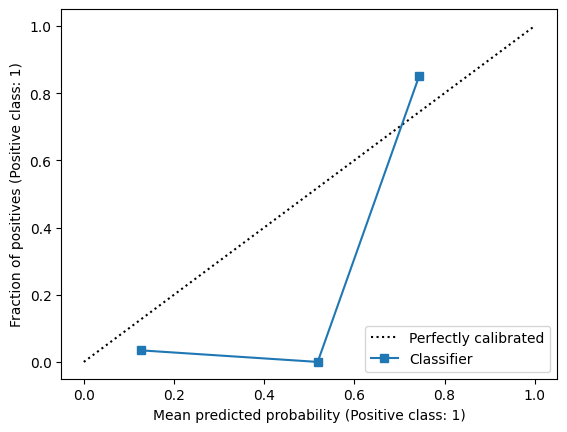

In [36]:
CalibrationDisplay.from_predictions(y_true=binarize(ytest,1),y_prob=probs_cal.softmax(dim=1)[:,1])

In [ ]:
CalibrationDisplay.from_predictions(y_true=binarize(ytest,0),y_prob=probs_cal.softmax(dim=1)[:,0],n_bins=20)

In [ ]:
calibration_error(preds=probs_cal,target=torch.tensor(ytest),task='multiclass',num_classes=3)

In [ ]:
calibration_error(preds=torch.tensor(probs),target=torch.tensor(ytest),task='multiclass',num_classes=3)

In [ ]:
from temperature_scaling import _ECELoss

In [ ]:
ece=_ECELoss(n_bins=10)

In [ ]:
ece.forward(probs_cal,ytest)

In [ ]:
ece.forward(probs,ytest)